**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: **LINETH DEL CARMEN GUERRA CAMARENA**
*   MATRÍCULA: **A01795639**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/data science"
os.chdir(DIR)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import seaborn as sns
plt.style.use("bmh")

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [7]:
df.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

Utilize el atributo dftypes para tener una visión clara de los datos númericos y cualitativos. Con el atributo dtypes.value_counts() devolvi un recuento de los datos.

Los datos númericos son sumando el int64 más el float64 como resultado es 8 y los cualitativos son 4.

 2. Determina el porcentaje de valores faltantes por columna.

In [8]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df.isna().sum().sum()

4011

***La suma de valores faltantes entre la columna person_emp_length y loan_int_rate es de 4011.***

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**variable person_age**

In [80]:
#media y mediana para person_age
media = df.person_age.mean()
mediana = df.person_age.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 27.73459992019889
La mediana es: 26.0


In [13]:
#dispersión o variabilidad para person_age
min = df.person_age.min()
max = df.person_age.max()
desv_est = df.person_age.std(axis = 0)
cuartiles = df['person_age'].quantile()
varianza = df['person_age'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 20
El max es: 144
La desviación estandar es: 6.348078419225359
El cuartil es: 26.0
La variaza es: 40.29809961663474


In [14]:
#asimetria y curtosis
asimetria = df.person_age.skew()
curtosis = df.person_age.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 2.5813925261849846
La curtosis es: 18.560824765312866


**variable person_income**

In [15]:
#media y mediana para person_income
media = df.person_income.mean()
mediana = df.person_income.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 66074.84846996715
La mediana es: 55000.0


In [16]:
#dispersión o variabilidad para person_income
min = df.person_income.min()
max = df.person_income.max()
desv_est = df.person_income.std(axis = 0)
cuartiles = df['person_income'].quantile()
varianza = df['person_income'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 4000
El max es: 6000000
La desviación estandar es: 61983.11916815907
El cuartil es: 55000.0
La variaza es: 3841907061.8142085


In [17]:
#asimetria y curtosis
asimetria = df.person_income.skew()
curtosis = df.person_income.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 32.865348833904434
La curtosis es: 2693.272775674123


**variable person_emp_length**

In [18]:
#media y mediana para person_emp_length
media = df.person_emp_length.mean()
mediana = df.person_emp_length.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 4.789686296787225
La mediana es: 4.0


In [19]:
#dispersión o variabilidad para person_emp_length
min = df.person_emp_length.min()
max = df.person_emp_length.max()
desv_est = df.person_emp_length.std(axis = 0)
cuartiles = df['person_emp_length'].quantile()
varianza = df['person_emp_length'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 0.0
El max es: 123.0
La desviación estandar es: 4.1426301488878625
El cuartil es: 4.0
La variaza es: 17.161384550474676


In [20]:
#asimetria y curtosis
asimetria = df.person_emp_length.skew()
curtosis = df.person_emp_length.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 2.6144551214595424
La curtosis es: 43.722338216746564


**variable loan_amnt**

In [21]:
#media y mediana para loan_amnt
media = df.loan_amnt.mean()
mediana = df.loan_amnt.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 9589.371105859243
La mediana es: 8000.0


In [22]:
#dispersión o variabilidad para loan_amnt
min = df.loan_amnt.min()
max = df.loan_amnt.max()
desv_est = df.loan_amnt.std(axis = 0)
cuartiles = df['loan_amnt'].quantile()
varianza = df['loan_amnt'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 500
El max es: 35000
La desviación estandar es: 6322.086645792259
El cuartil es: 8000.0
La variaza es: 39968779.556904815


In [23]:
#asimetria y curtosis
asimetria = df.loan_amnt.skew()
curtosis = df.loan_amnt.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 1.1924774277661998
La curtosis es: 1.4235653072764443


**variable loan_int_rate**

In [82]:
#media y mediana para loan_int_rate
media = df.loan_int_rate.mean()
mediana = df.loan_int_rate.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 11.011694892245036
La mediana es: 10.99


In [25]:
#dispersión o variabilidad para loan_int_rate
min = df.loan_int_rate.min()
max = df.loan_int_rate.max()
desv_est = df.loan_int_rate.std(axis = 0)
cuartiles = df['loan_int_rate'].quantile()
varianza = df['loan_int_rate'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 5.42
El max es: 23.22
La desviación estandar es: 3.2404594649559466
El cuartil es: 10.99
La variaza es: 10.50057754402258


In [26]:
#asimetria y curtosis
asimetria = df.loan_int_rate.skew()
curtosis = df.loan_int_rate.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 0.2085503016908977
La curtosis es: -0.6716091079813706


**variable loan_status**

In [27]:
#media y mediana para loan_status
media = df.loan_status.mean()
mediana = df.loan_status.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 0.21816396059052823
La mediana es: 0.0


In [28]:
#dispersión o variabilidad para loan_status
min = df.loan_status.min()
max = df.loan_status.max()
desv_est = df.loan_status.std(axis = 0)
cuartiles = df['loan_status'].quantile()
varianza = df['loan_status'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 0
El max es: 1
La desviación estandar es: 0.4130056685601487
El cuartil es: 0.0
La variaza es: 0.17057368226281538


In [29]:
#asimetria y curtosis
asimetria = df.loan_status.skew()
curtosis = df.loan_status.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 1.3648884873271683
La curtosis es: -0.13708783613132303


**variable loan_percent_income**

In [30]:
#media y mediana para loan_percent_income
media = df.loan_percent_income.mean()
mediana = df.loan_percent_income.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 0.1702034928332464
La mediana es: 0.15


In [31]:
#dispersión o variabilidad para loan_percent_income
min = df.loan_percent_income.min()
max = df.loan_percent_income.max()
desv_est = df.loan_percent_income.std(axis = 0)
cuartiles = df['loan_percent_income'].quantile()
varianza = df['loan_percent_income'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 0.0
El max es: 0.83
La desviación estandar es: 0.10678175634492382
El cuartil es: 0.15
La variaza es: 0.011402343488106677


In [32]:
#asimetria y curtosis
asimetria = df.loan_percent_income.skew()
curtosis = df.loan_percent_income.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 1.0646686367683245
La curtosis es: 1.2236866782856817


**varibale cb_person_cred_hist_length**

In [33]:
#media y mediana para cb_person_cred_hist_length
media = df.cb_person_cred_hist_length.mean()
mediana = df.cb_person_cred_hist_length.median()
print("La media es:", media)
print("La mediana es:", mediana)

La media es: 5.804211043246064
La mediana es: 4.0


In [34]:
#dispersión o variabilidad para cb_person_cred_hist_length
min = df.cb_person_cred_hist_length.min()
max = df.cb_person_cred_hist_length.max()
desv_est = df.cb_person_cred_hist_length.std(axis = 0)
cuartiles = df['cb_person_cred_hist_length'].quantile()
varianza = df['cb_person_cred_hist_length'].var()
print("El min es:", min)
print("El max es:", max)
print("La desviación estandar es:", desv_est)
print("El cuartil es:", cuartiles)
print("La variaza es:", varianza)

El min es: 2
El max es: 30
La desviación estandar es: 4.055001164712727
El cuartil es: 4.0
La variaza es: 16.44303444582157


In [35]:
#asimetria y curtosis
asimetria = df.cb_person_cred_hist_length.skew()
curtosis = df.cb_person_cred_hist_length.kurt()
print("La asimetria es:",asimetria)
print("La curtosis es:",curtosis)

La asimetria es: 1.6617901199126253
La curtosis es: 3.7161938192947908


# ***Clasificación de person_age y loan_in_rate según asimetria y curtosis***

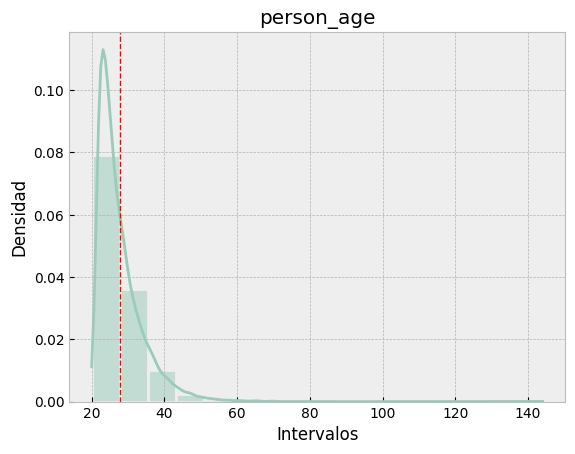

In [86]:
#histograma con la distribución de varibales y asimetria de la variable person_age
sns.set_palette("hls")
ax = sns.histplot(df["person_age"], color="#99CCB9", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["person_age"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("person_age")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***person_age su asimetría es positiva, como se visualiza en la gráfica según la asimetria tiene una distribución sesgada hacia la derecha, significa que los datos se concentran hacia la derecha. La curtosis en esta variable es leptocúrtica, porque tiene una cola pesada y elevada.***

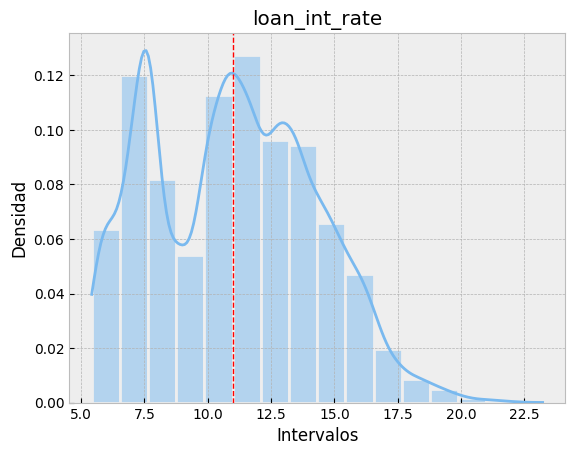

In [76]:
#histograma para la distribución de varibales de loan_int_rate según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["loan_int_rate"], color="#79B9EF", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["loan_int_rate"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("loan_int_rate")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***La asimetria es positiva todos los datos se ubican hacia la derecha.***

***La curtosis es negativa según el calculo es -0.16 se denomina platicúrtica. Tiene colas más ligeras y un pico menos pronunciado ya que los datos no son uniformes.***

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

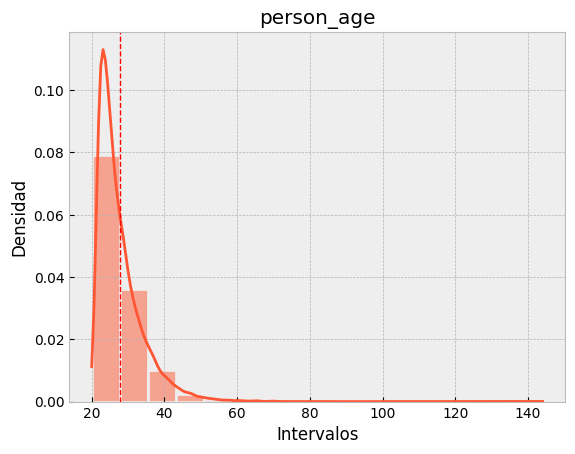

In [36]:
#histograma con la distribución de varibales y asimetria de la variable person_age
sns.set_palette("hls")
ax = sns.histplot(df["person_age"], color="#FF5733", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["person_age"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("person_age")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***Analizamos esta variable en el ejercicio 3, según los calculos la asimetria es positiva y concuerda con la media y mediana.***

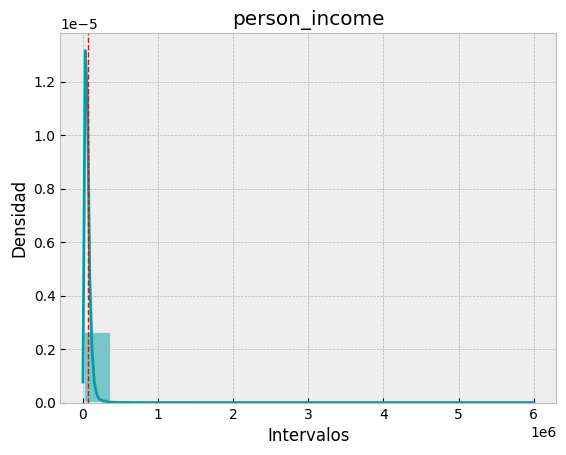

In [170]:
#histograma para la distribución de varibales de person_income según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["person_income"], color="#009EA5", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["person_income"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("person_income")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***En esta gráfica visualizamos que la curtosis es muy elevada en este caso la distribución es simetrica porque los datos no presentaron uniformidad en la gráfica. Aquí la media y la mediana no corresponde al calculo realizado en el paso 3.***

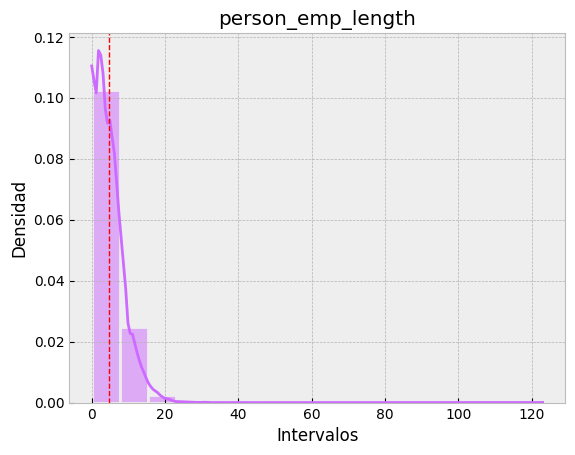

In [38]:
#histograma para la distribución de varibales de person_emp_length según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["person_emp_length"], color="#CD6AFF", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["person_emp_length"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("person_emp_length")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***La asimetria es positiva la media y mediana corresponde a los calculos realizados en el paso 3.***



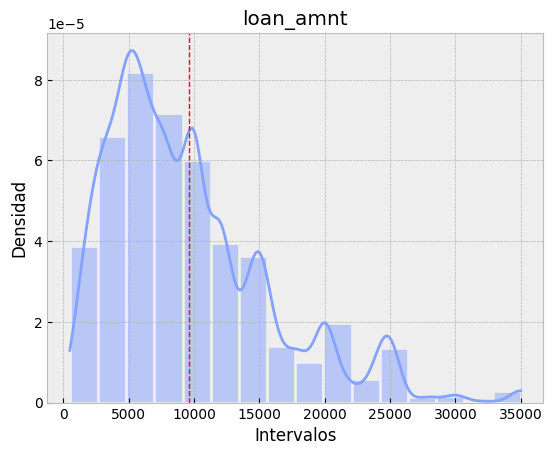

In [39]:
#histograma para la distribución de varibales de loan_amnt según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["loan_amnt"], color="#84A2FF", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["loan_amnt"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("loan_amnt")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***La asimetria es positiva porque es mayor a 0 y los datos se ubican hacia la derecha en este caso la media y mediana corresponde a los calculos del paso 3 como se visualiza en la gráfica.***

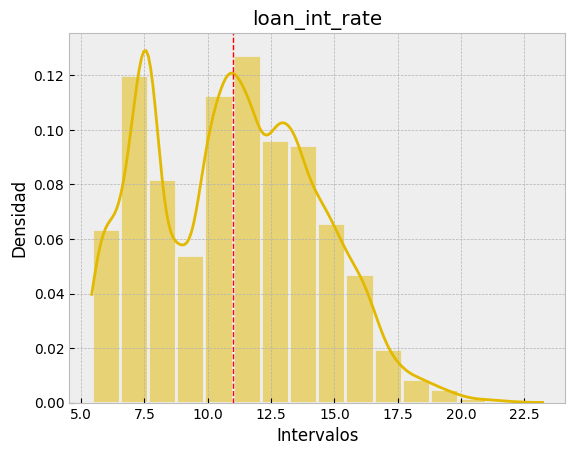

In [40]:
#histograma para la distribución de varibales de loan_int_rate según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["loan_int_rate"], color="#E2B900", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["loan_int_rate"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("loan_int_rate")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***La asimetria es positiva todos los datos se ubican hacia la derecha. La media y mediana en la gráfica concuerdan con los calculos del ejercico 3.***

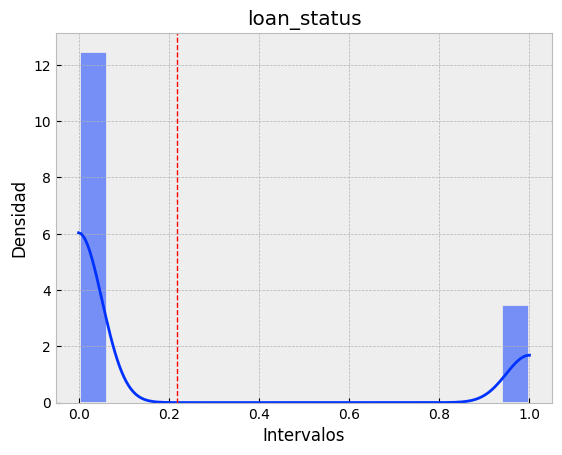

In [41]:
#histograma para la distribución de varibales de loan_status según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["loan_status"], color="#0032FF", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["loan_status"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("loan_status")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***En este caso la distribución es simetrica ya que tenemos datos en la derecha e izquierda y no hay orden en los datos.***

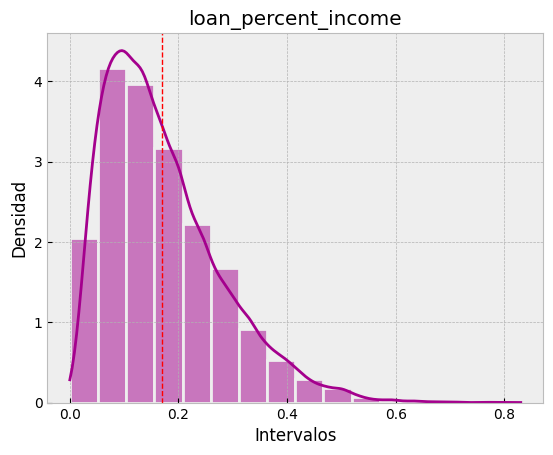

In [42]:
#histograma para la distribución de varibales de loan_percent_income según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["loan_percent_income"], color="#A4008D", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["loan_percent_income"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("loan_percent_income")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***La asimetria es positiva los datos mayormente esta ubicados hacia la derecha.***

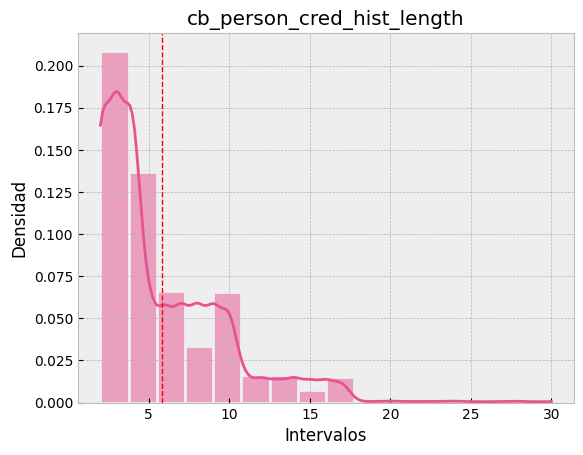

In [43]:
#histograma para la distribución de varibales de cb_person_cred_hist_length según asimetria
sns.set_palette("hls")
ax = sns.histplot(df["cb_person_cred_hist_length"], color="#E95290", bins=16, kde=True, stat="density", linewidth=2)
plt.axvline(df["cb_person_cred_hist_length"].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("cb_person_cred_hist_length")
ax.set_xlabel("Intervalos")
ax.set_ylabel("Densidad")
plt.show()

***La asimetria es positiva sin embargo la curtosis es negativa. Sin embargo podemos visualizar que la media y mediana corresponde a los calculos.***

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

**Variable person_age**

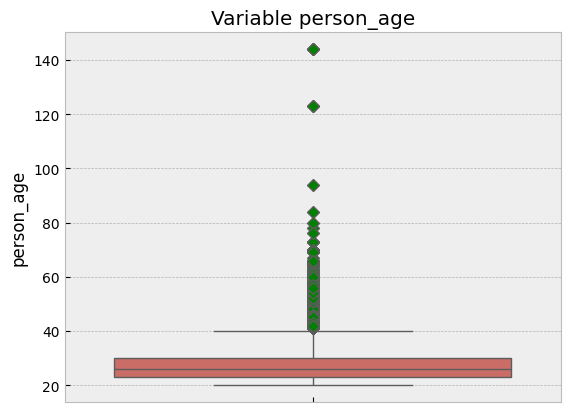

In [44]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Variable person_age')
sns.boxplot(df['person_age'], flierprops=green_diamond);

**Variable person_income**

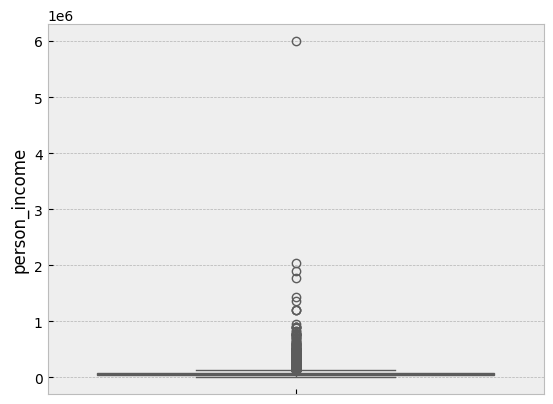

In [45]:
sns.boxplot(df['person_income'])
plt.show()

**Variable person_emp_length**

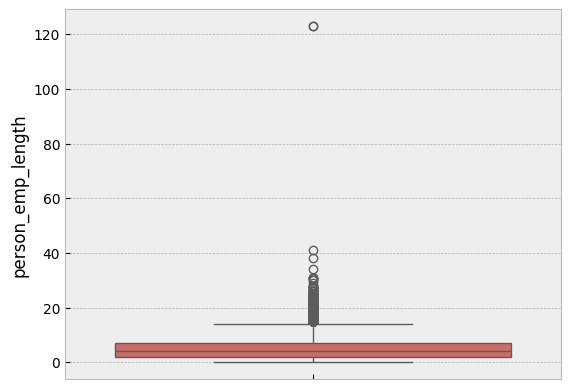

In [46]:
sns.boxplot(df['person_emp_length']);

**Variable loan_amnt**

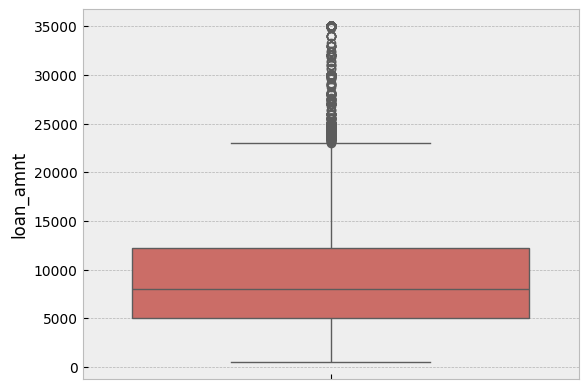

In [47]:
#green_diamond = dict(markerfacecolor='g', marker='D')
#fig, ax = plt.subplots()
#ax.set_title('Variable loan_amnt')
sns.boxplot(df['loan_amnt'])
plt.show()

**Variable loan_int_rate**

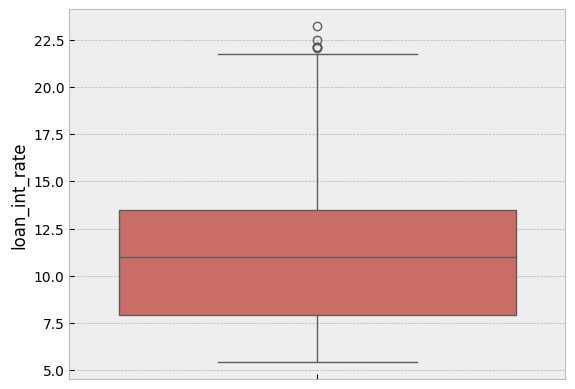

In [48]:
#green_diamond = dict(markerfacecolor='g', marker='D')
#fig, ax = plt.subplots()
#ax.set_title('Variable loan_int_rate')
sns.boxplot(df['loan_int_rate']);
plt.show()

**Variable loan_status**

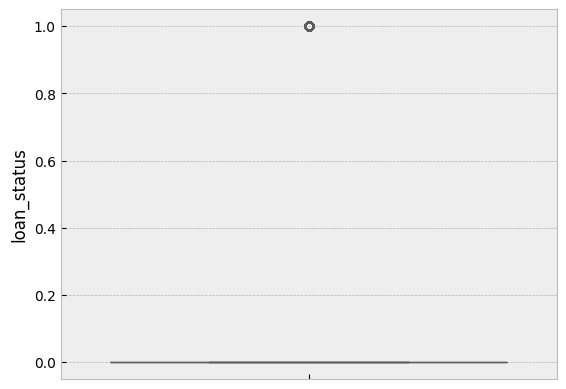

In [49]:
sns.boxplot(df['loan_status']);
plt.show()

**El cuartil calculado en el punto 3 para la variable loan_status es 0 por lo tanto el boxplot se mantiene en el punto de origen.**

**Variable loan_percent_income**

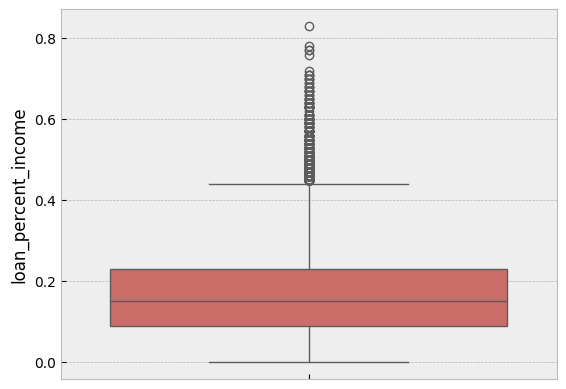

In [50]:
sns.boxplot(df['loan_percent_income'])
plt.show()

**Variable cb_person_cred_hist_length**

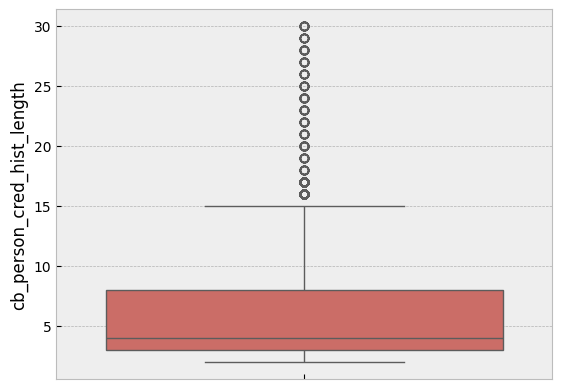

In [51]:
sns.boxplot(df['cb_person_cred_hist_length'])
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [52]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


***En person_age utilice en la gráfica tipo boxplot marque los outlers en forma diamante de color verde para visualizar los valores atípicos como se ve en la imagen en el punto 123 y 144 estan distanciado de los demás puntos, en cuanto al boxplot los datos estan trazados igualmente como el calculo del cuartil en el paso 3.***

# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [53]:
df.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


**estadística descriptiva para varibales de texto person_home_onership**

In [54]:
#tendencia central
moda = df['person_home_ownership'].mode()
print("La tendencia central es:", moda)

La tendencia central es: 0    RENT
Name: person_home_ownership, dtype: object


In [55]:
#cardinalidad
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [56]:
#recuentos únicos
df['person_home_ownership'].nunique()

4

**estadística descriptiva para varibales de texto loan_intent**

In [83]:
#tendencia central
moda = statistics.mode(df['loan_intent'])
print("La tendencia central es:", moda)

La tendencia central es: EDUCATION


In [58]:
#cardinalidad
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [59]:
#recuentos únicos
df['loan_intent'].nunique()

6

**estadística descriptiva para varibales de texto loan_grade**

In [84]:
#tendencia central
moda = statistics.mode(df['loan_grade'])
print("La tendencia central es:", moda)

La tendencia central es: A


In [61]:
#cardinalidad
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [62]:
#recuentos únicos
df['loan_grade'].nunique()

7

**estadística descriptiva para varibales de texto cb_person_default_on_file**

In [85]:
#tendencia central
moda = statistics.mode(df['cb_person_default_on_file'])
print("La tendencia central es:", moda)

La tendencia central es: N


In [64]:
#cardinalidad
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [65]:
#recuentos únicos
df['cb_person_default_on_file'].nunique()

2

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

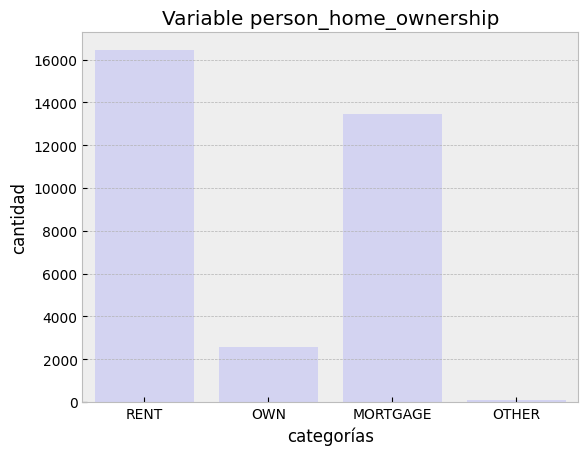

In [66]:
ax = sns.countplot(x = 'person_home_ownership', data=df, color="#CECEF6")
ax.set_title("Variable person_home_ownership")
ax.set_ylabel("cantidad")
ax.set_xlabel("categorías")
plt.show()

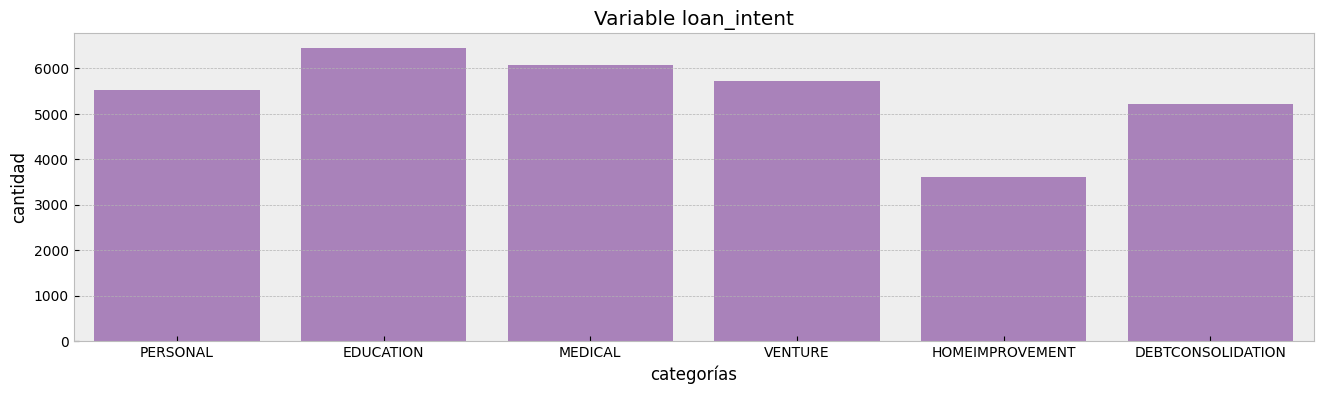

In [67]:
fig,ax=plt.subplots(1,1,figsize=(16,4),dpi=100)
ax = sns.countplot(x = 'loan_intent', data=df, color="#AC79C3")
ax.set_title("Variable loan_intent")
ax.set_ylabel("cantidad")
ax.set_xlabel("categorías")
plt.show()

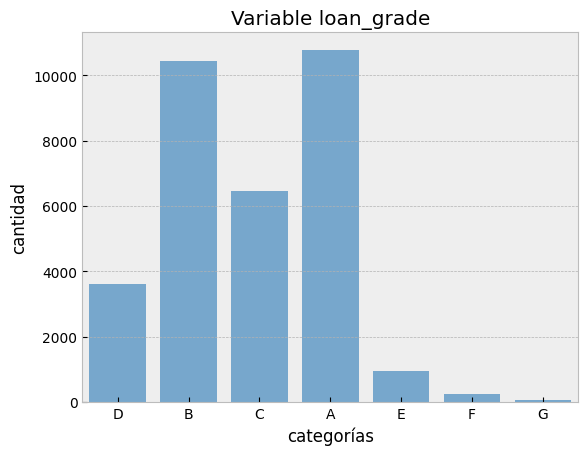

In [68]:
ax = sns.countplot(x = 'loan_grade', data=df, color="#69A9DA")
ax.set_title("Variable loan_grade")
ax.set_ylabel("cantidad")
ax.set_xlabel("categorías")
plt.show()

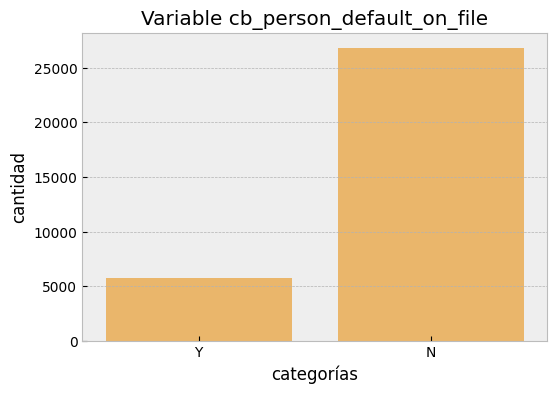

In [69]:
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=100)
ax = sns.countplot(x = 'cb_person_default_on_file', data=df, color="#FFBA56")
ax.set_title("Variable cb_person_default_on_file")
ax.set_ylabel("cantidad")
ax.set_xlabel("categorías")
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

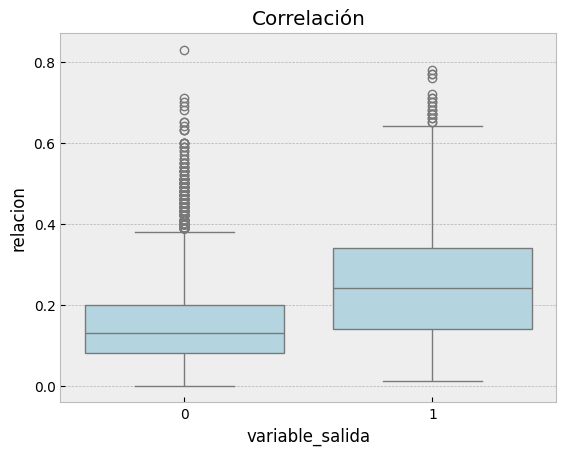

In [87]:
ax = sns.boxplot(x='loan_status', y='loan_percent_income', data=df, color='lightblue')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***En este boxplot tenemos como variable de salida loan_satus y analizamos su relación con la variable loan_percent_income. En este caso ambas variables tienen diferencias en la distribución y en las medianas se observa que el boxplot para loan_percent_income se aplana un poco porque tiene mayor cantidad de valores atípicos. En conclusión loan_percent_income podría ser util para loan_status como predictor.***

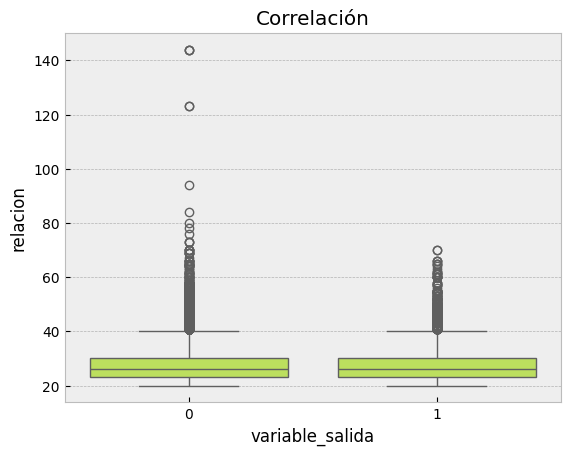

In [91]:
ax = sns.boxplot(x='loan_status', y='person_age', data=df, color='#C6F548')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***En el caso de person_age con loan_status de variable de salida no hay diferencias en la distribución, lo único que difiere es que person_age tiene una cantidad mayor de valores atípicos. Sin embargo person_age no es útil como predictor para loan_status.***

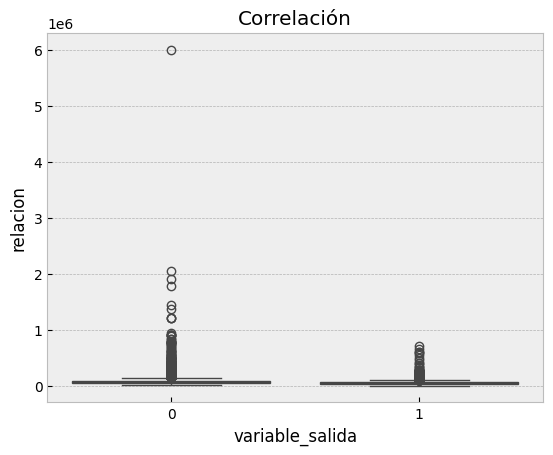

In [92]:
ax = sns.boxplot(x='loan_status', y='person_income', data=df, color='#0090E8')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***En este caso ambas variables demuestran que no pueden utilizarce juntas para realizar predicciones.***

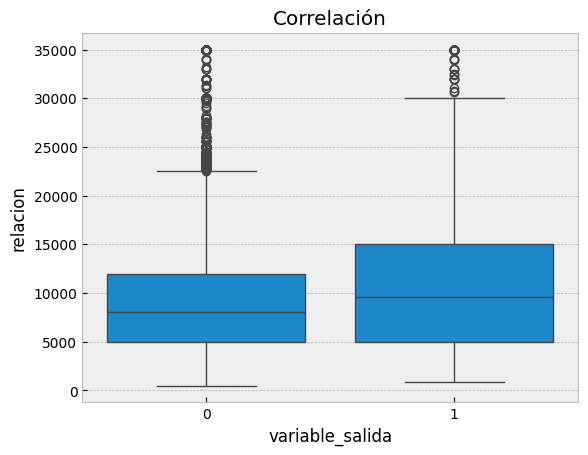

In [93]:
ax = sns.boxplot(x='loan_status', y='loan_amnt', data=df, color='#0090E8')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***En ese boxplot la diferencia entre las medianas de ambas variables no tiene gran diferencia sin embargo por la distribución  de datos la cual tiene diferencias, loan_amnt sería un buen predictor para loan_status.***

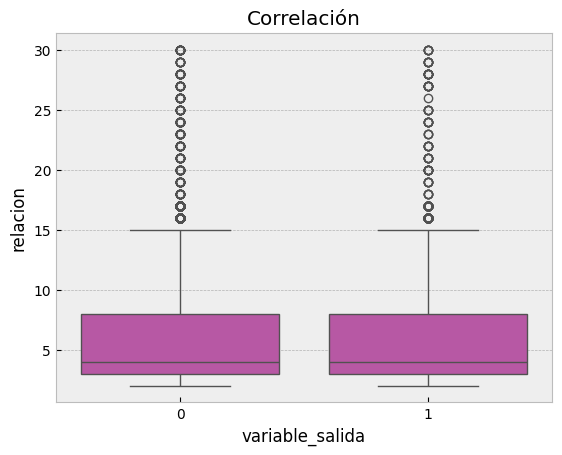

In [94]:
ax = sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df, color='#C748AE')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***La variable cb_person_cred_hist_length con loan_status comparten las mismas categorías no hay diferencias incluso tienen la misma cantidad de valores atípicos. cb_person_cred_hist_length no es buen predictor para loan_status.***

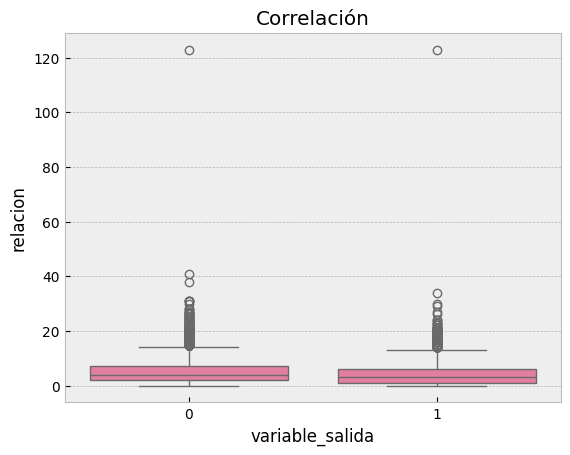

In [95]:
ax = sns.boxplot(x='loan_status', y='person_emp_length', data=df, color='#F36E98')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***La variable person_emp_length con loan_status tienen una mínima diferencia en la mediana, sin embargo no la variable no seria un predictor útil para loan_status.***

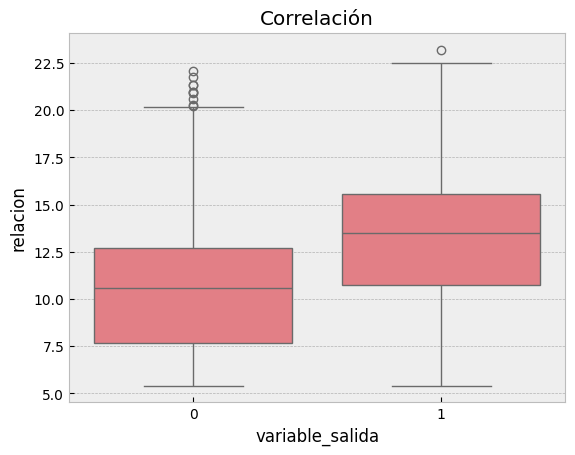

In [96]:
ax = sns.boxplot(x='loan_status', y='loan_int_rate', data=df, color='#F36E78')
ax.set_title("Correlación")
ax.set_ylabel("relacion")
ax.set_xlabel("variable_salida")
plt.show()

***La variable loan_int_rate sería un buen predictor para loan_staus ya que ambas tienen diferencias en la mediana y en la distribución de datos.***

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `loan_status`, utilizando el parámetro `hue`.

In [122]:
df.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


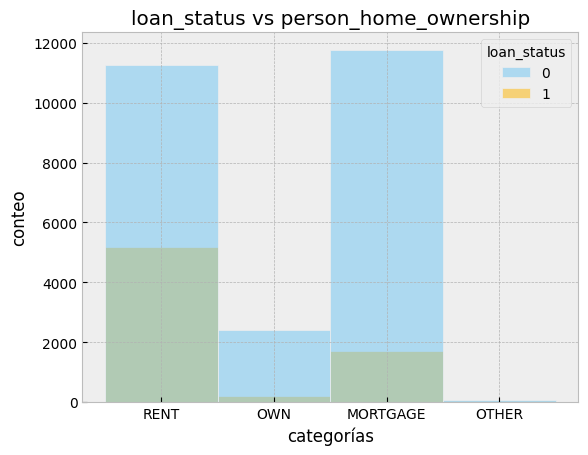

In [121]:
ax = sns.histplot(data=df, x='person_home_ownership', hue='loan_status', palette=['#6EC5F3', '#FFB600'])
ax.set_title("loan_status vs person_home_ownership")
ax.set_ylabel("conteo")
ax.set_xlabel("categorías")
plt.show()

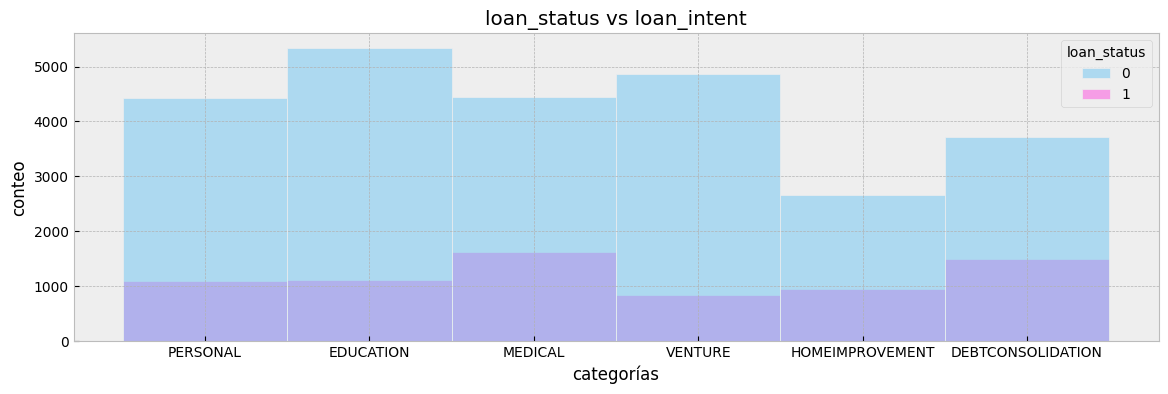

In [132]:
fig,ax=plt.subplots(1,1,figsize=(14,4),dpi=100)
ax = sns.histplot(data=df, x='loan_intent', hue='loan_status', palette=['#6EC5F3', '#FF4DDF'])
ax.set_title("loan_status vs loan_intent")
ax.set_ylabel("conteo")
ax.set_xlabel("categorías")
plt.show()

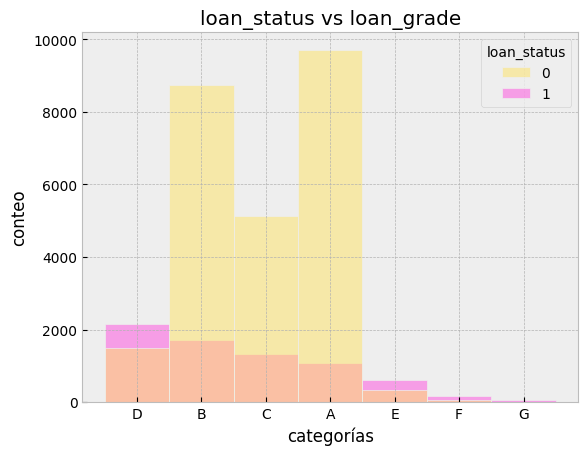

In [136]:
ax = sns.histplot(data=df, x='loan_grade', hue='loan_status', palette=['#FFE364', '#FF4DDF'])
ax.set_title("loan_status vs loan_grade")
ax.set_ylabel("conteo")
ax.set_xlabel("categorías")
plt.show()

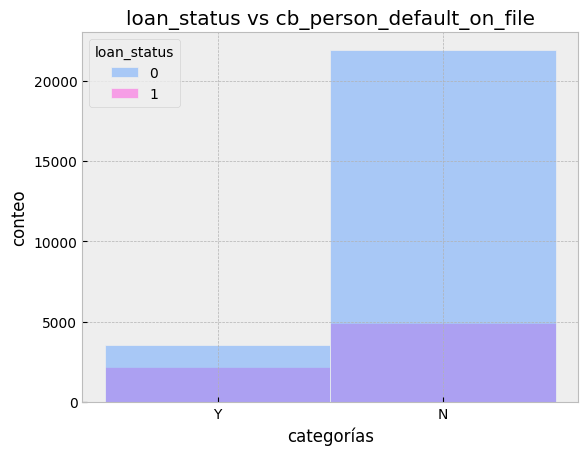

In [140]:
ax = sns.histplot(data=df, x='cb_person_default_on_file', hue='loan_status', palette=['#64A3FF', '#FF4DDF'])
ax.set_title("loan_status vs cb_person_default_on_file")
ax.set_ylabel("conteo")
ax.set_xlabel("categorías")
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<ipython-input-159-90c517778daa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm")


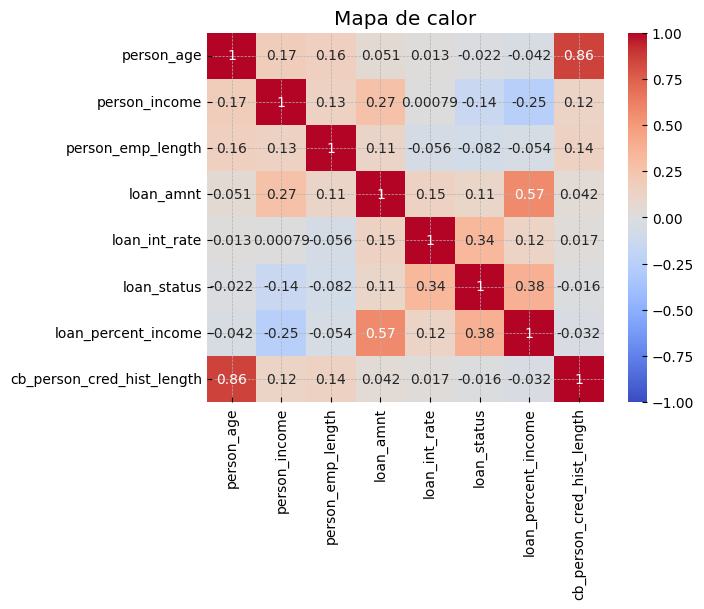

In [159]:
ax = sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm")
ax.set_title("Mapa de calor")
plt.show()

***En el mapa de calor podemos visualizar que loan_status tiene una correlación con person_age en -0.022, de manera vertical tomamos como referencia el número -0.022, de manera horizontal podemos ver como loan_status se correlaciona con la variable person_age.***

***Comprender la correlación con la densidad del color. El cuadro de color más brillante representa una fuerte correlación entre las variables, mientras que el cuadro de color más oscuro representa una menor correlación o correlación negativa.***